# dropout笔记
要求这种加入噪声的方式是无偏差的： 

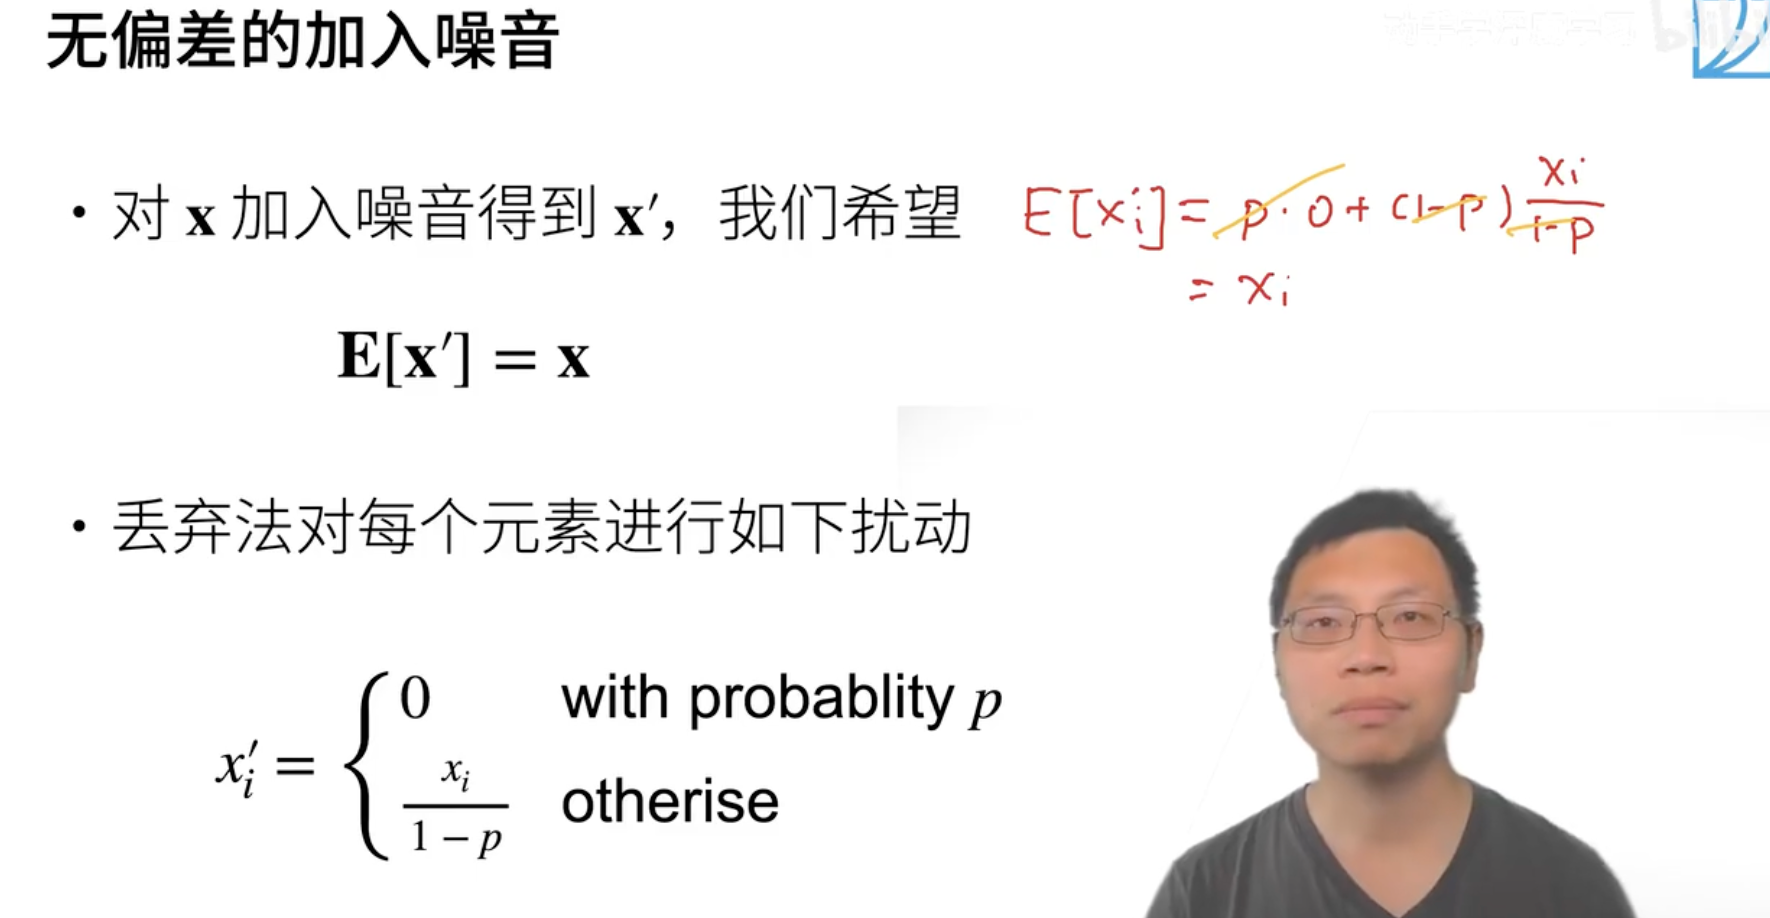

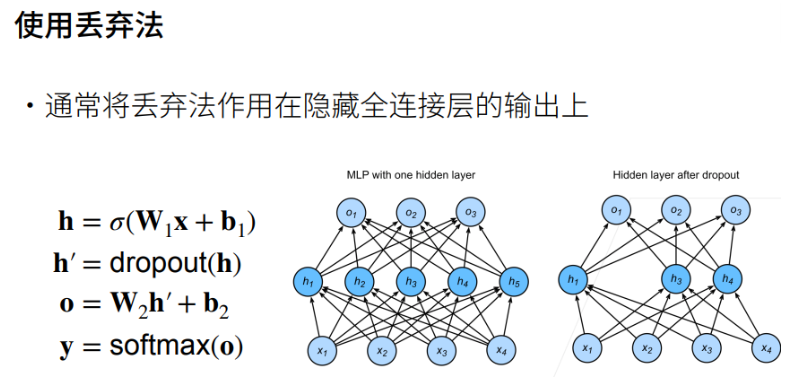

<font color=red> dropout只在训练时候使用，推理时不用。只对权重影响
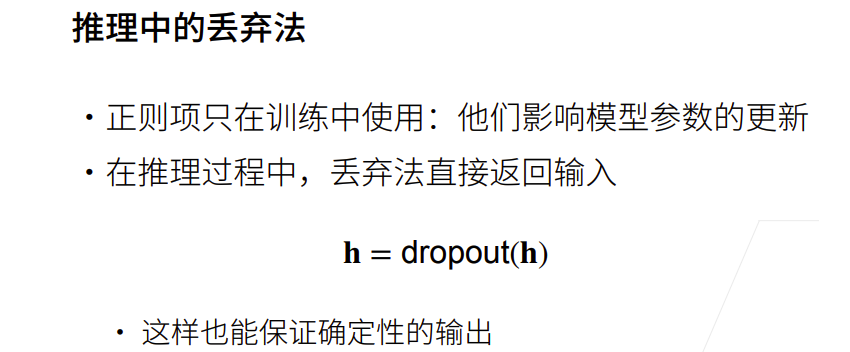

- 丢弃的概率是控制模型复杂度的超参数～
- 常作用在多层感知机的隐藏层输出上


总结：【最主流的对多层感知机模型的控制方法】   
- 暂退法在前向传播过程中，计算每一内部层的同时丢弃一些神经元。
- 暂退法可以避免过拟合，它通常与控制权重向量的维数和大小结合使用的。
- 暂退法仅在训练期间使用。

# 简洁实现


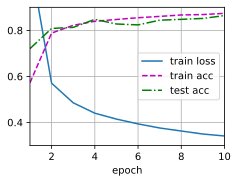

In [4]:
import torch
from torch import nn
from d2l import torch as d2l

# 简洁实现
num_epochs, lr, batch_size = 10, 0.5, 256
dropout1, dropout2 = 0.2, 0.5
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加dropout
                    nn.Dropout(dropout1),
                    nn.Linear(256,256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加dropout
                    nn.Dropout(dropout2),
                    nn.Linear(256,10))
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)

# 训练和测试
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

____
其他问题。

1. Flatten层的功能：Flatten层是把一个输入的大小为n * c * h * w变成一个简单的向量，其大小为 n * (chw)。可以用reshape代替~，相当于第一维不变，后面的自动计算。
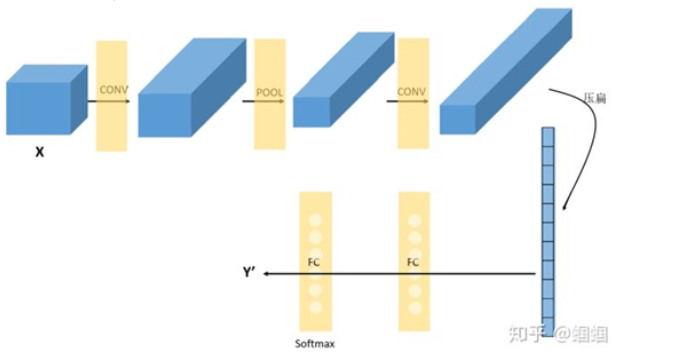